In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

##### comparision of Andy's results, code from Andy's and mine

In [2]:
n_month = 12
n_wt = 12

In [3]:
year_s = 1979
year_e = 2014

/glade/work/mingge/miniconda3/envs/casper_2020/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


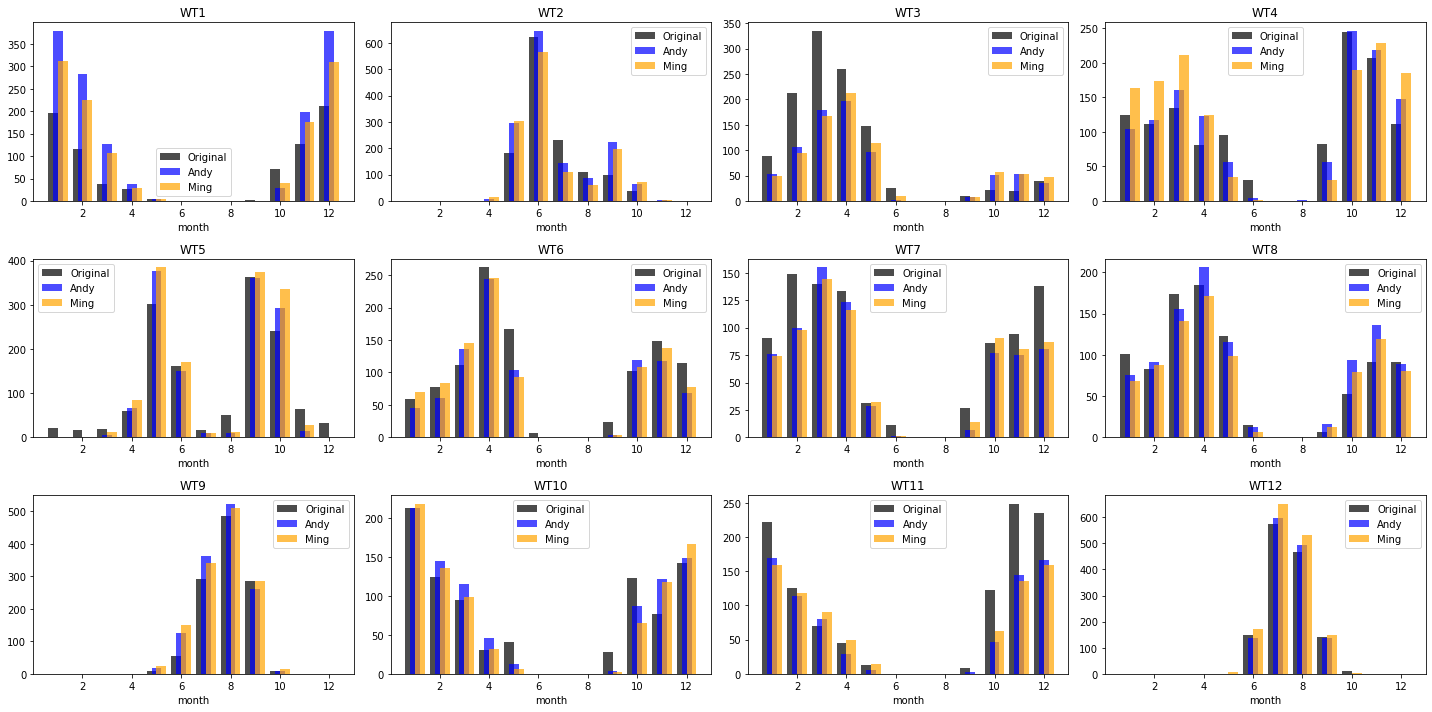

In [4]:
n_method = 3
arr_3d = np.zeros((n_method, n_wt, n_month))

#### Andy's original
flnm_i = '/glade/u/home/prein/papers/ExtremePRinWT/programs/WT-Optimization/Add-Param/PCACA12_psl-uv700-pw-US-ERAint-1979-2014.cla'
fwidths = [4,3,3,3,4]  
wts = pd.read_fwf(flnm_i, widths = fwidths, header=None, names=["year", "month", "day", "hr", "wt"])
 
for nm in range(n_month):
        month_0 = nm + 1
         
        # Get the First Row of a Pandas DataFrame
        for wt in range(1, n_wt+1,1):
            rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
            arr_3d[0][wt-1][nm]=arr_3d[0][wt-1][nm] + len(rows)

#### calculate centroid from Andy's original results and then weather typing again 
#### according to Andy's paper, it's 31-day rolling average, calcuated centroid didn't do it 
flnm_i = '/glade/u/home/mingge/WTing_existing-centroids/PCACA12_ERA-Interim-1979-2014_TEST-ERA-Interim_PSL-UV700-PW.cla'
wts = pd.read_csv(flnm_i, delimiter = '\\t', header=None,  names=["year", "month", "day", "hr", "wt"])

for nm in range(n_month):
        month_0 = nm + 1
         
        # Get the First Row of a Pandas DataFrame        
        for wt in range(1, n_wt+1,1):
            rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
            arr_3d[1][wt-1][nm]=arr_3d[1][wt-1][nm] + len(rows)            

#### Calculated from npz centroid Andy gave me, guess without rolling average            
dir_i = '/glade/campaign/mmm/c3we/mingge/ERA_INTERIM/WT/' 
for year in range(year_s, year_e+1, 1):
    flnm_i = dir_i + 'CONUS-WTs_' + str(year) + '.cla'
    wts = pd.read_csv(flnm_i, delimiter = '\t', header=None,  names=["year", "month", "day", "wt"])
       
    for nm in range(n_month):
        month_0 = nm + 1
        
        # Get the First Row of a Pandas DataFrame                
        for wt in range(1, n_wt+1,1):
            rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
            arr_3d[2][wt-1][nm]=arr_3d[2][wt-1][nm] + len(rows)            

### PLOTTING            
fig, axs = plt.subplots(3, 4, figsize=(20,10))
index = np.arange(1,n_wt+1,1)
bar_width = 0.4
gap_width = 0.2
opacity = 0.7

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        #print(nn)
        axs[nr][nc].set_xlabel("month")
        axs[nr][nc].set_title("WT" + str(nn+1))
        axs[nr][nc].bar(index-gap_width, arr_3d[0][nn],alpha=opacity, 
                        align='center', label='Original',color ="black", width = bar_width )
        axs[nr][nc].bar(index, arr_3d[1][nn],alpha=opacity, 
                        align='center', label='Andy',color ="blue", width = bar_width)
        axs[nr][nc].bar(index+gap_width, arr_3d[2][nn],alpha=opacity, 
                        align='center', label='Ming',color ="orange", width = bar_width)
        #axs[nr][nc].axis(ymin=0.5,ymax=80000) 
        #axs[nr][nc].xlim([0, 2000])
        axs[nr][nc].legend()
plt.tight_layout() 


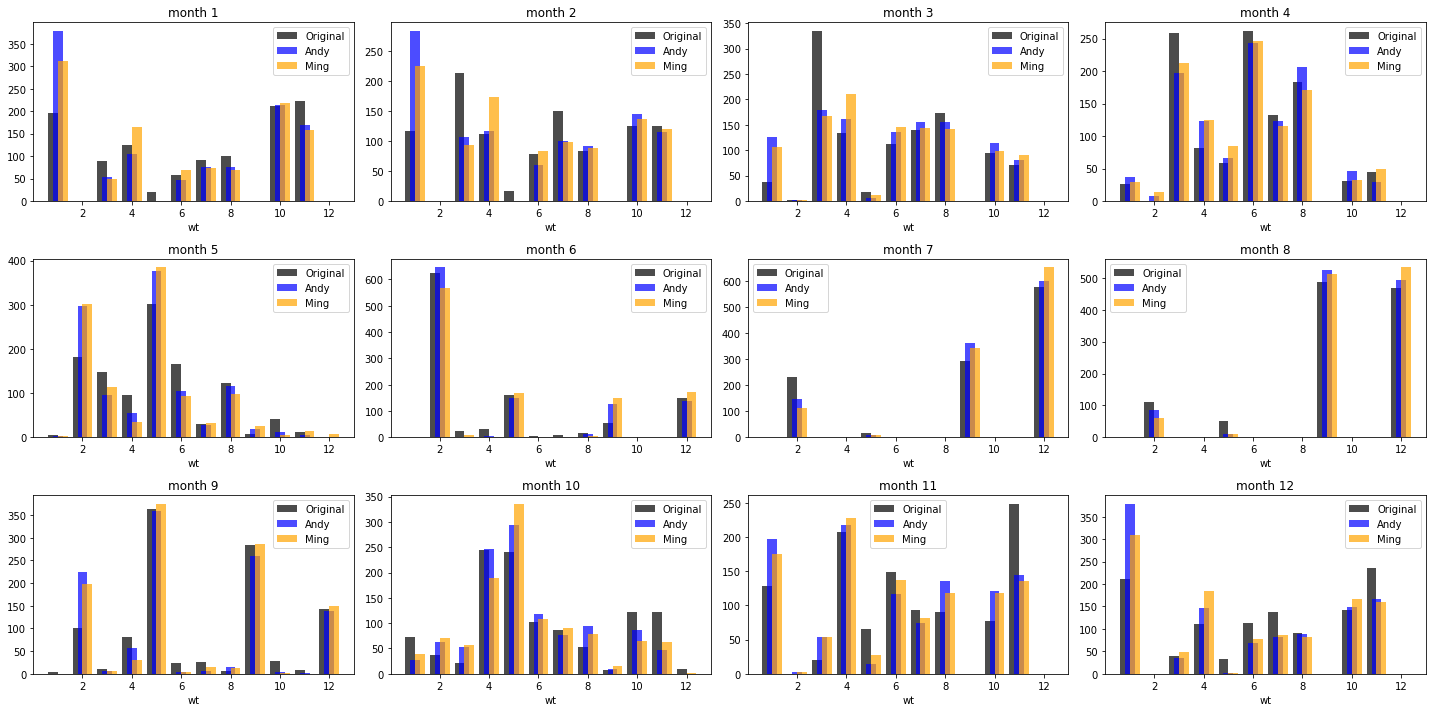

In [17]:
### PLOTTING    

arr_swap_3d=arr_3d.swapaxes(1, 2)

fig, axs = plt.subplots(3, 4, figsize=(20,10))
index = np.arange(1,n_wt+1,1)
bar_width = 0.4
gap_width = 0.2
opacity = 0.7

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        #print(nn)
        axs[nr][nc].set_xlabel("wt")
        axs[nr][nc].set_title("month " + str(nn+1))
        axs[nr][nc].bar(index-gap_width, arr_swap_3d[0][nn],alpha=opacity, 
                        align='center', label='Original',color ="black", width = bar_width )
        axs[nr][nc].bar(index, arr_swap_3d[1][nn],alpha=opacity, 
                        align='center', label='Andy',color ="blue", width = bar_width)
        axs[nr][nc].bar(index+gap_width, arr_swap_3d[2][nn],alpha=opacity, 
                        align='center', label='Ming',color ="orange", width = bar_width)
        axs[nr][nc].legend()
plt.tight_layout() 

#### plot Andy's existed results

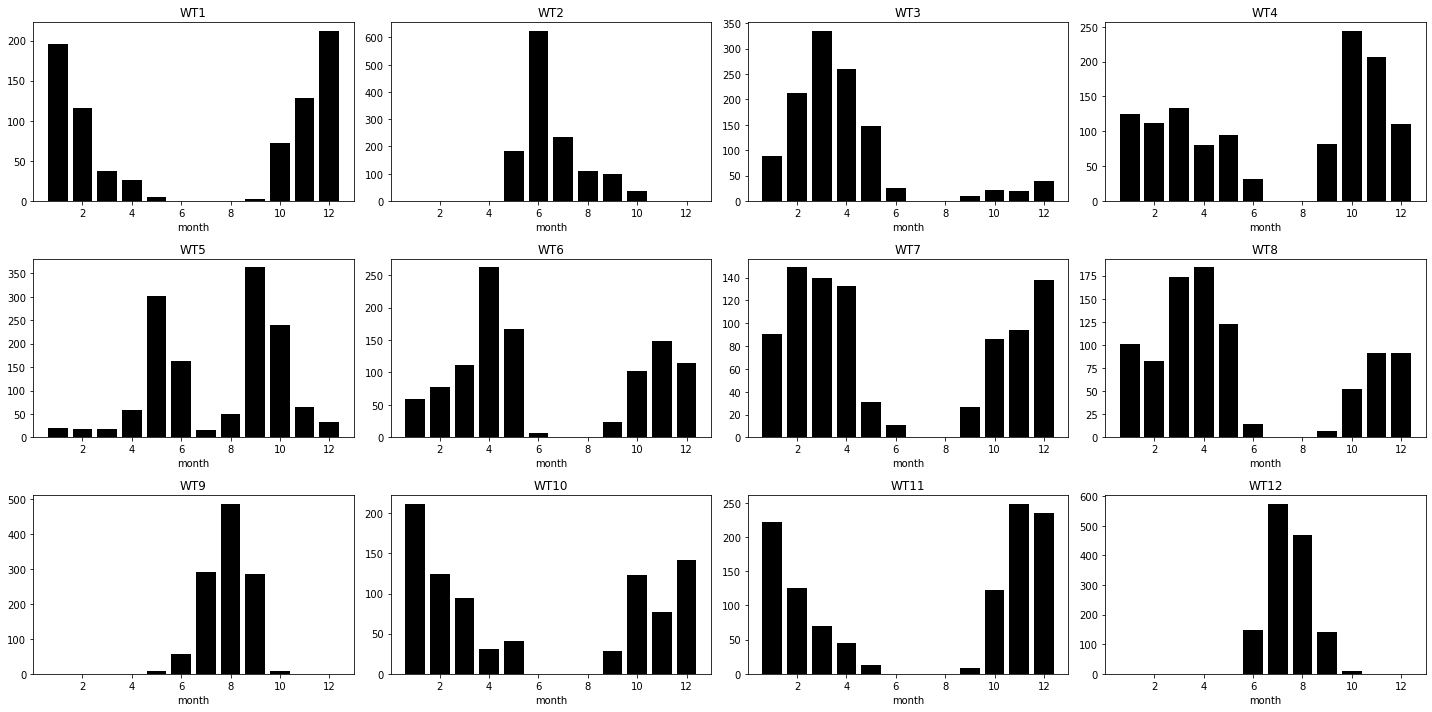

In [14]:
flnm_i = '/glade/u/home/prein/papers/ExtremePRinWT/programs/WT-Optimization/Add-Param/PCACA12_psl-uv700-pw-US-ERAint-1979-2014.cla'
fwidths = [4,3,3,3,4]  
wts = pd.read_fwf(flnm_i, widths = fwidths, header=None, names=["year", "month", "day", "hr", "wt"])
 
arr_2d = np.zeros((n_wt, n_month))
for nm in range(n_month):
        month_0 = nm + 1
         
        # Get the First Row of a Pandas DataFrame
        for wt in range(1, n_wt+1,1):
            rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
            arr_2d[wt-1][nm]=arr_2d[wt-1][nm] + len(rows)
            
fig, axs = plt.subplots(3, 4, figsize=(20,10))

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        #print(nn)
        axs[nr][nc].set_xlabel("month")
        axs[nr][nc].set_title("WT" + str(nn+1))
        axs[nr][nc].bar(range(1,13,1), arr_2d[nn], color ="black")
        #axs[nr][nc].axis(ymin=0.5,ymax=80000) 
        #axs[nr][nc].xlim([0, 2000])
plt.tight_layout()

#### Plot results from AssignToExistingWTs_ERA_Interim_global.ipynb based on Andy's TEST-AssigmentERA-Int.py

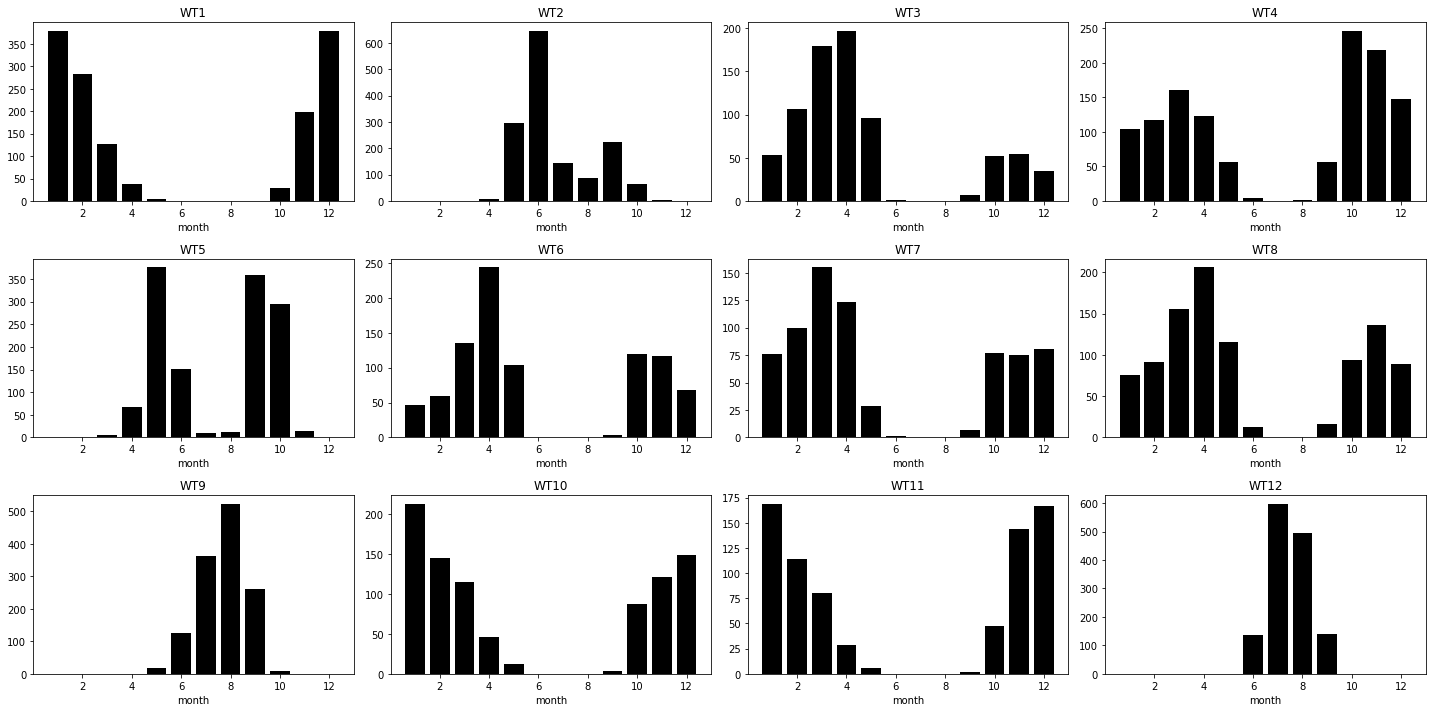

In [15]:
flnm_i = '/glade/u/home/mingge/WTing_existing-centroids/PCACA12_ERA-Interim-1979-2014_TEST-ERA-Interim_PSL-UV700-PW.cla'

wts = pd.read_csv(flnm_i, delimiter = '\\t', header=None,  names=["year", "month", "day", "hr", "wt"])

arr_2d = np.zeros((n_wt, n_month))
for nm in range(n_month):
        month_0 = nm + 1
         
        # Get the First Row of a Pandas DataFrame        
        for wt in range(1, n_wt+1,1):
            rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
            arr_2d[wt-1][nm]=arr_2d[wt-1][nm] + len(rows)
            
fig, axs = plt.subplots(3, 4, figsize=(20,10))

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        #print(nn)
        axs[nr][nc].set_xlabel("month")
        axs[nr][nc].set_title("WT" + str(nn+1))
        axs[nr][nc].bar(range(1,13,1), arr_2d[nn], color ="black")
plt.tight_layout()

#### results from old npz centroid I used, no rolling

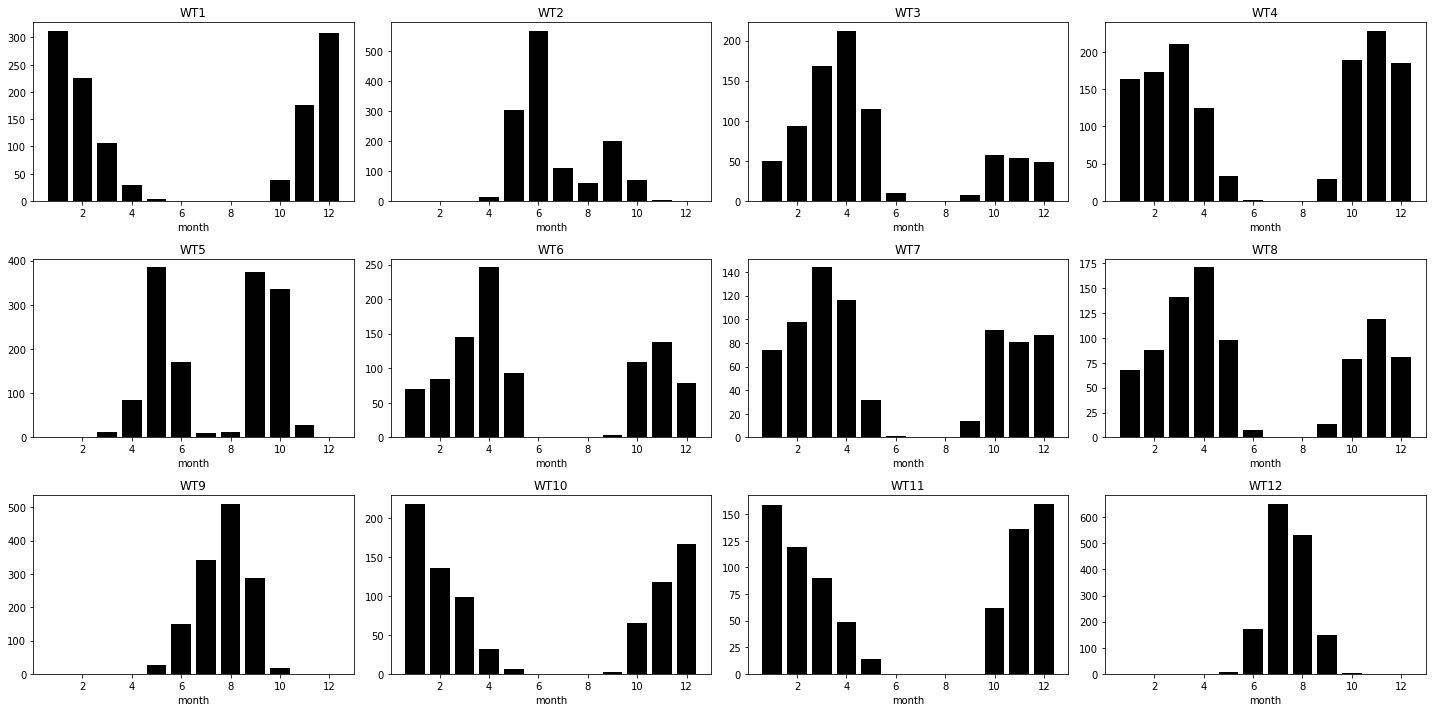

In [16]:
dir_i = '/glade/campaign/mmm/c3we/mingge/ERA_INTERIM/WT/' 

arr_2d = np.zeros((n_wt, n_month))
for year in range(year_s, year_e+1, 1):
    flnm_i = dir_i + 'CONUS-WTs_' + str(year) + '.cla'
    #print(flnm_i)
    wts = pd.read_csv(flnm_i, delimiter = '\t', header=None,  names=["year", "month", "day", "wt"])
       
    for nm in range(n_month):
        month_0 = nm + 1
        
        # Get the First Row of a Pandas DataFrame                
        for wt in range(1, n_wt+1,1):
            rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
            arr_2d[wt-1][nm]=arr_2d[wt-1][nm] + len(rows)

fig, axs = plt.subplots(3, 4, figsize=(20,10))

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        #print(nn)
        axs[nr][nc].set_xlabel("month")
        axs[nr][nc].set_title("WT" + str(nn+1))
        axs[nr][nc].bar(range(1,13,1), arr_2d[nn], color ="black")
plt.tight_layout()

#### results from old npz centroid, 31 rolling average

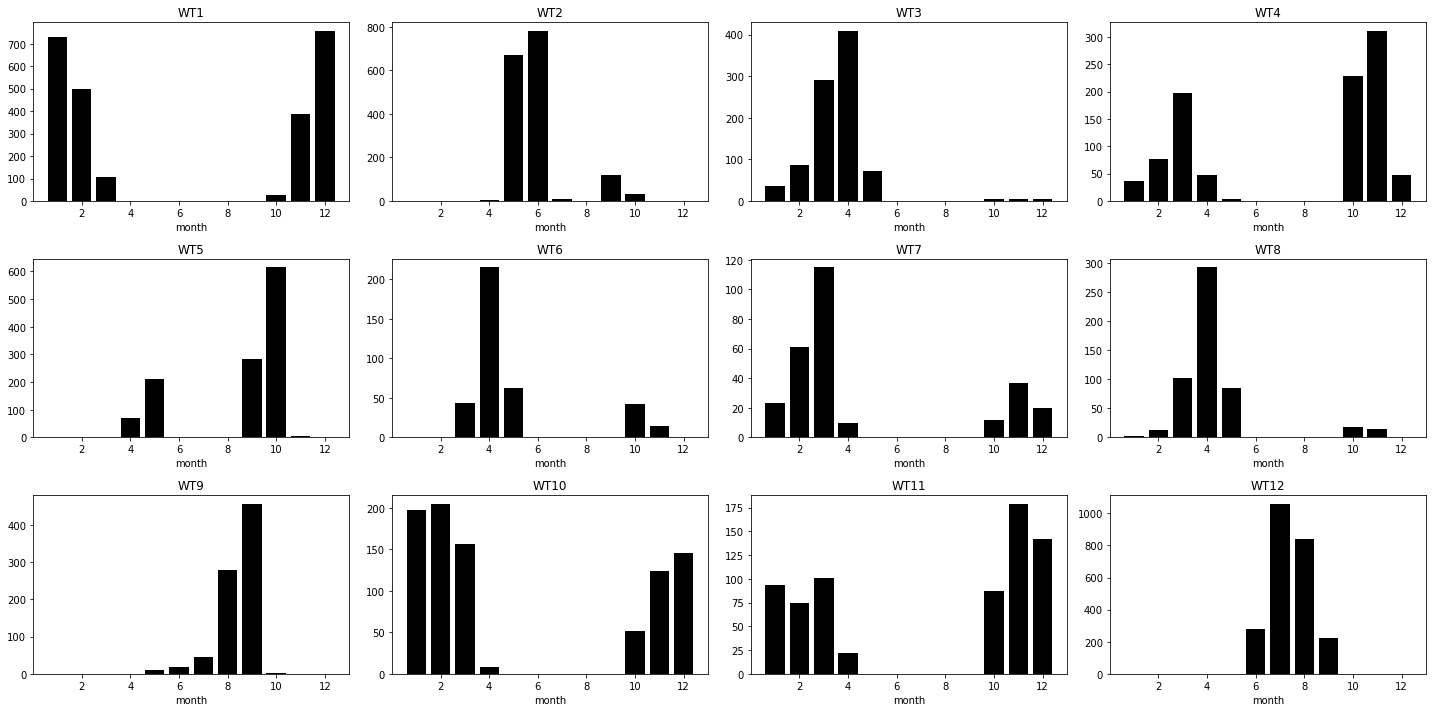

In [10]:
dir_i = '/glade/campaign/mmm/c3we/mingge/ERA_INTERIM/WT_31rolling/' 

arr_2d = np.zeros((n_wt, n_month))
for year in range(year_s, year_e+1, 1):
    flnm_i = dir_i + 'CONUS-WTs_' + str(year) + '.cla'
    #print(flnm_i)
    wts = pd.read_csv(flnm_i, delimiter = '\t', header=None,  names=["year", "month", "day", "wt"])
       
    for nm in range(n_month):
        month_0 = nm + 1
        rows_month = wts[(wts['month']==month_0)]
        # Get the First Row of a Pandas DataFrame
                
        for wt in range(1, n_wt+1,1):
            rows=wts[(wts['month']==month_0) & (wts['wt']==wt)]
            arr_2d[wt-1][nm]=arr_2d[wt-1][nm] + len(rows)

fig, axs = plt.subplots(3, 4, figsize=(20,10))

for nr in range(3):
    for nc in range(4):
        nn = nr*4 + nc
        #print(nn)
        axs[nr][nc].set_xlabel("month")
        axs[nr][nc].set_title("WT" + str(nn+1))
        axs[nr][nc].bar(range(1,13,1), arr_2d[nn], color ="black")
plt.tight_layout()       